In [2]:
notes =[note for note in 'C|C#Db|D|D#Eb|E|F|F#Gb|G|G#Ab|A|A#Bb|B'.split('|')]
octaves = [n for n in range(7)]

for octave in octaves: exec(f"octave{octave} = [note+str({octave}) for note in notes]")

_all = octave0 + octave1 + octave2 + octave3 + octave4 + octave5 + octave6 # automate this later

semitone_difference = 2**(1/12)

cents = 100
cent = semitone_difference/cents
semitone = 100 * cent

A440 = ref_pitch = 440.0 # reference pitch A4
A4 = ref_pitch
A4 *(semitone**-1), A4 *(semitone**0), A4 *(semitone**1), A4 *(semitone**2)

(415.3046975799451, 440.0, 466.1637615180899, 493.8833012561241)

In [3]:
octave0

['C0',
 'C#Db0',
 'D0',
 'D#Eb0',
 'E0',
 'F0',
 'F#Gb0',
 'G0',
 'G#Ab0',
 'A0',
 'A#Bb0',
 'B0']

In [289]:
power = math.log(new_note_dict['B6']/ref_pitch, semitone)
round(power)

26

In [290]:
import numpy as np
from numpy import arange, vectorize

In [291]:
note_numbers = arange(-57,27)
print(note_numbers)

[-57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40
 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22
 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15  16  17  18  19  20  21  22  23  24  25  26]


In [4]:
2**2

4

In [293]:
function = lambda x: A4 * (semitone_difference**x)
vfunc = vectorize(function)
frequencies = vfunc(note_numbers)
frequencies

array([  16.35159783,   17.32391444,   18.35404799,   19.44543648,
         20.60172231,   21.82676446,   23.12465142,   24.49971475,
         25.9565436 ,   27.5       ,   29.13523509,   30.86770633,
         32.70319566,   34.64782887,   36.70809599,   38.89087297,
         41.20344461,   43.65352893,   46.24930284,   48.9994295 ,
         51.9130872 ,   55.        ,   58.27047019,   61.73541266,
         65.40639133,   69.29565774,   73.41619198,   77.78174593,
         82.40688923,   87.30705786,   92.49860568,   97.998859  ,
        103.82617439,  110.        ,  116.54094038,  123.47082531,
        130.81278265,  138.59131549,  146.83238396,  155.56349186,
        164.81377846,  174.61411572,  184.99721136,  195.99771799,
        207.65234879,  220.        ,  233.08188076,  246.94165063,
        261.6255653 ,  277.18263098,  293.66476792,  311.12698372,
        329.62755691,  349.22823143,  369.99442271,  391.99543598,
        415.30469758,  440.        ,  466.16376152,  493.88330

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

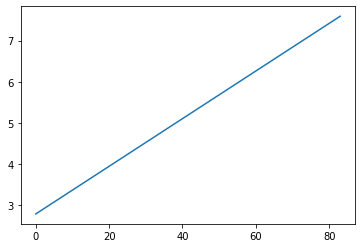

In [295]:
sns.lineplot(data =np.log(frequencies));

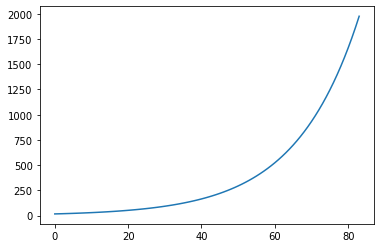

In [296]:
sns.lineplot(data =frequencies);

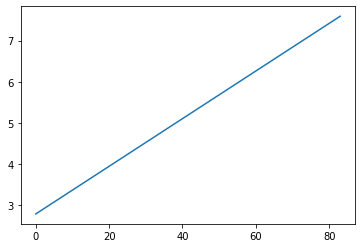

In [269]:
sns.lineplot(data =np.log(frequencies));

In [221]:
A4 *(semitone**power)

1975.5332050244976

In [211]:
A4 *(semitone**power) == new_note_dict['C0']

False

In [297]:
import sounddevice as sd
import time

In [307]:
def play(note_frequency, duration=0.5):
    sps = 44100 # samples per second
    freq_hz = note_frequency # frequency or pitch
    duration_s = duration # duration seconds
    atten = 0.3 # attenuation or lowering the volume

    # numpy to calculate the waveform
    each_sample_number = np.arange(duration_s * sps)
    waveform = np.sin(2 * np.pi * each_sample_number * freq_hz / sps)
    waveform_quiet = waveform * atten

    sd.play(waveform_quiet, sps)
    time.sleep(duration_s)
    sd.stop()

In [311]:
for frq in frequencies[50:70]:
    play(frq)

In [202]:
import math

In [206]:
a = (new_note_dict['B4']/ref_pitch)
base = semitone
math.log(a, base)

1.9999999999999991

In [175]:
dict_notes ={'A4':440.0}
temp = A4
for note,i in zip(_all[56::-1],([n for n in range(0,57)][::-1])):
    temp = temp/semitone
    dict_notes.update({note:temp})

In [176]:
temp = A4
for note,i in zip(_all[58::1],([n for n in range(0,57)][::1])):
    temp = temp*semitone
    dict_notes.update({note:temp})

In [178]:
new_note_dict = {}
for note in _all:
    new_note_dict.update({note:dict_notes[note]})

In [179]:
new_note_dict

{'C0': 16.35159783128737,
 'C#Db0': 17.323914436054462,
 'D0': 18.354047994837927,
 'D#Eb0': 19.445436482630008,
 'E0': 20.60172230705432,
 'F0': 21.82676446456269,
 'F#Gb0': 23.124651419477093,
 'G0': 24.499714748859272,
 'G#Ab0': 25.95654359874651,
 'A0': 27.499999999999936,
 'A#Bb0': 29.135235094880553,
 'B0': 30.867706328507687,
 'C1': 32.70319566257476,
 'C#Db1': 34.64782887210894,
 'D1': 36.70809598967587,
 'D#Eb1': 38.89087296526004,
 'E1': 41.20344461410866,
 'F1': 43.6535289291254,
 'F#Gb1': 46.249302838954215,
 'G1': 48.99942949771857,
 'G#Ab1': 51.91308719749305,
 'A1': 54.9999999999999,
 'A#Bb1': 58.270470189761134,
 'B1': 61.7354126570154,
 'C2': 65.40639132514954,
 'C#Db2': 69.2956577442179,
 'D2': 73.41619197935177,
 'D#Eb2': 77.7817459305201,
 'E2': 82.40688922821735,
 'F2': 87.30705785825084,
 'F#Gb2': 92.49860567790847,
 'G2': 97.99885899543719,
 'G#Ab2': 103.82617439498615,
 'A2': 109.99999999999987,
 'A#Bb2': 116.54094037952235,
 'B2': 123.4708253140309,
 'C3': 130.

In [ ]:
frequencies = {
    
}